In [52]:
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras
import pickle
import random

In [53]:
with open("./traffic-signs-data/train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p",mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [54]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [55]:
x_train.shape

(34799, 32, 32, 3)

In [56]:
y_train.shape

(34799,)

25

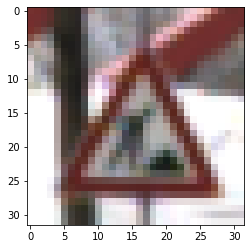

In [57]:
i = np.random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]

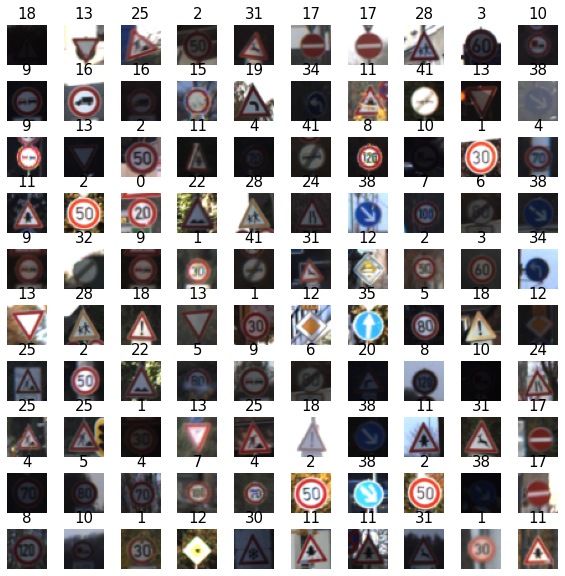

In [58]:
W_grid = 10 
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_training =len(x_train)

for i in np.arange(0, W_grid * L_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [97]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [60]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

In [ ]:
x_train_gray.shape

In [61]:
x_train_gray_norm = (x_train_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128

In [62]:
x_train_gray_norm

array([[[[ 9.92187500e-01],
         [ 9.92187500e-01],
         [ 9.92187500e-01],
         ...,
         [ 9.92187500e-01],
         [ 9.92187500e-01],
         [ 9.92187500e-01]],

        [[ 9.92187500e-01],
         [ 9.92187500e-01],
         [ 9.89583333e-01],
         ...,
         [ 9.92187500e-01],
         [ 9.84375000e-01],
         [ 9.47916667e-01]],

        [[ 9.92187500e-01],
         [ 9.92187500e-01],
         [ 9.89583333e-01],
         ...,
         [ 9.55729167e-01],
         [ 8.20312500e-01],
         [ 5.26041667e-01]],

        ...,

        [[-6.06770833e-01],
         [-5.83333333e-01],
         [-5.59895833e-01],
         ...,
         [-4.24479167e-01],
         [-4.19270833e-01],
         [-4.37500000e-01]],

        [[-6.17187500e-01],
         [-5.85937500e-01],
         [-5.57291667e-01],
         ...,
         [-4.21875000e-01],
         [-4.19270833e-01],
         [-4.40104167e-01]],

        [[-5.91145833e-01],
         [-5.85937500e-01],
         [

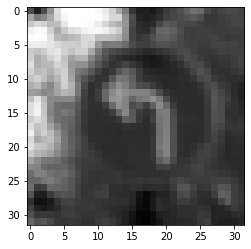

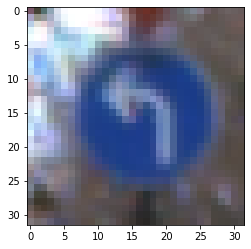

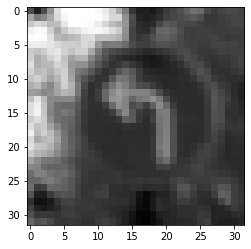

In [63]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(),cmap = 'gray')


In [64]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape =(32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

In [65]:
CNN.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [78]:
history = CNN.fit(x_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (x_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 1s 32us/sample - loss: 0.0197 - acc: 0.9939 - val_loss: 0.5515 - val_acc: 0.9045
Epoch 2/50
34799/34799 [==============================] - 1s 31us/sample - loss: 0.0186 - acc: 0.9945 - val_loss: 0.5026 - val_acc: 0.9240
Epoch 3/50
34799/34799 [==============================] - 1s 31us/sample - loss: 0.0200 - acc: 0.9940 - val_loss: 0.6128 - val_acc: 0.9161
Epoch 4/50
34799/34799 [==============================] - 1s 31us/sample - loss: 0.0216 - acc: 0.9930 - val_loss: 0.5108 - val_acc: 0.9111
Epoch 5/50
34799/34799 [==============================] - 1s 30us/sample - loss: 0.0191 - acc: 0.9943 - val_loss: 0.5866 - val_acc: 0.9116
Epoch 6/50
34799/34799 [==============================] - 1s 31us/sample - loss: 0.0172 - acc: 0.9946 - val_loss: 0.5606 - val_acc: 0.9043
Epoch 7/50
34799/34799 [==============================] - 1s 31us/sample - loss: 0.0204 - acc: 0.9933 - val_loss: 0.5

In [79]:
score = CNN.evaluate(x_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))


12630/12630 [==============================] - 1s 56us/sample - loss: 0.6545 - acc: 0.9179
Test Accuracy: 0.9178938865661621


In [80]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

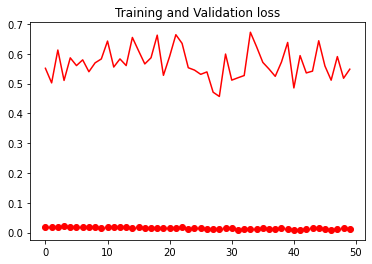

In [84]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title ('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

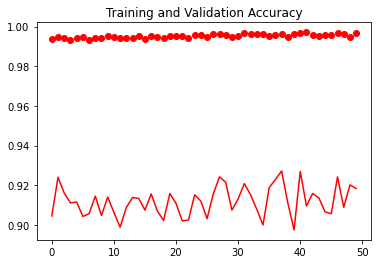

In [86]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title ('Training and Validation Accuracy')

<AxesSubplot:>

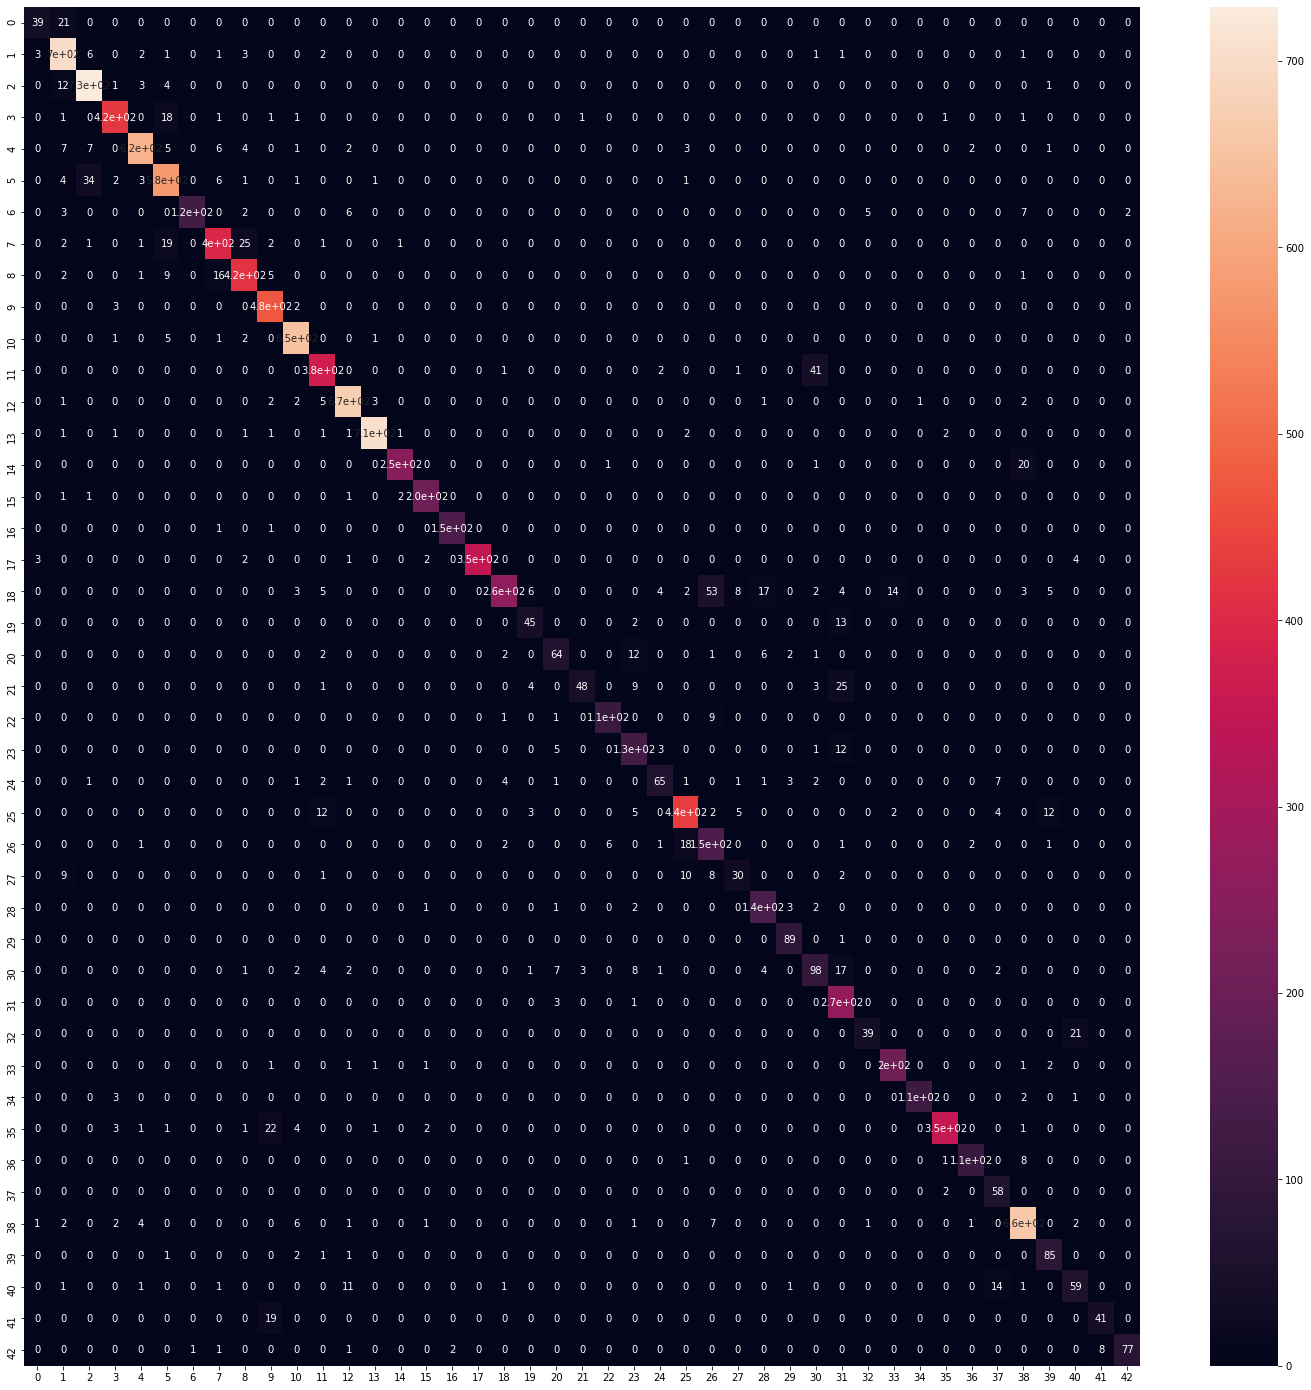

In [89]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

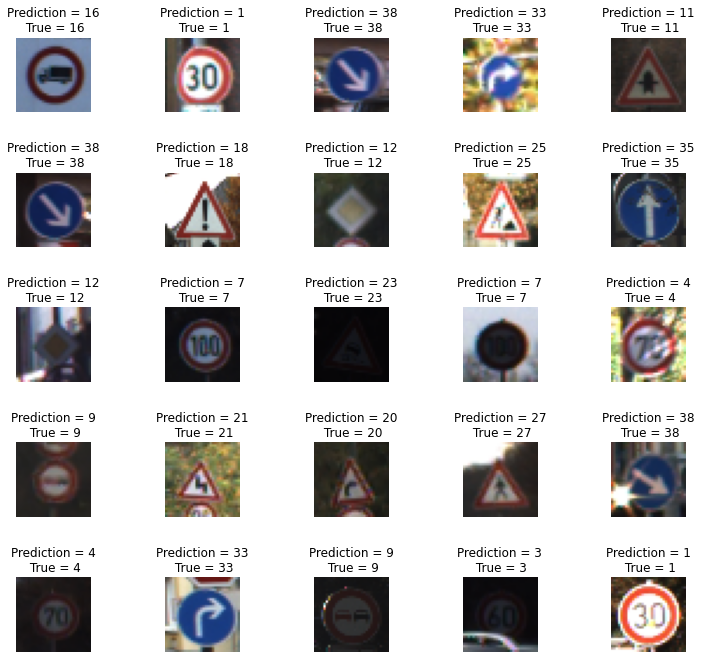

In [96]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)